In [8]:
# authors: Vladimir Osin, Ekhtiar Syed 

# import libs
import pandas  as pd
import numpy   as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

### Data Load/First Look 

In [9]:
# read data
data = pd.read_csv('C:/Users/20176827/Documents/Datasets/smartData.csv', low_memory=False)

# clean data
data = data.drop(['Unnamed: 0'], axis=1)

# trasnform date from string to datetime
data['date'] = pd.to_datetime(data['date'])

C:\Users\20176827\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (22,23,25,26,28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
# example: if you want to save converted data frame 
# data.to_csv('input_data/smart_data_updated.csv', index=False)

In [63]:
data.columns

Index(['Serial', 'date', 'exp', 'host', 'smart1', 'smart2', 'smart3', 'smart4',
       'smart5', 'smart7', 'smart8', 'smart9', 'smart10', 'smart12',
       'smart192', 'smart193', 'smart194', 'smart196', 'smart197', 'smart198',
       'smart199', 'Version', 'Device', 'Port', 'Model', 'Smart', 'Size',
       'Vendor'],
      dtype='object')

In [60]:
# let's look on few data rows
data.head(10)

,Serial,date,exp,host,smart1,smart2,smart3,smart4,smart5,smart7,...,smart197,smart198,smart199,Version,Device,Port,Model,Smart,Size,Vendor
0,174DK3RAFTMB,2017-12-17 01:00:00,cms,P06636710Y61826,0.0,0.0,10392.0,3.0,0.0,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,174DK3RAFTMB,2017-12-18 01:00:00,cms,P06636710Y61826,0.0,0.0,10392.0,3.0,0.0,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,174DK3RAFTMB,2017-12-19 01:00:00,cms,P06636710Y61826,0.0,0.0,10392.0,3.0,0.0,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,174DK3RAFTMB,2017-12-20 01:00:00,cms,P06636710Y61826,0.0,0.0,10392.0,3.0,0.0,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,174DK3RAFTMB,2017-12-21 01:00:00,cms,P06636710Y61826,0.0,0.0,10392.0,3.0,0.0,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,174DK3RAFTMB,2017-12-22 01:00:00,cms,P06636710Y61826,0.0,0.0,10392.0,3.0,0.0,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,174DK3RAFTMB,2017-12-23 01:00:00,cms,P06636710Y61826,0.0,0.0,10392.0,3.0,0.0,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,174DK3RAFTMB,2017-12-24 01:00:00,cms,P06636710Y61826,0.0,0.0,10392.0,3.0,0.0,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,174DK3RAFTMB,2017-12-25 01:00:00,cms,P06636710Y61826,0.0,0.0,10392.0,3.0,0.0,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,174DK3RAFTMB,2017-12-26 01:00:00,cms,P06636710Y61826,0.0,0.0,10392.0,3.0,0.0,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Basic look on data columns:

In [64]:
# lets print out a few key numbers
print(f'Number of unique hosts: {len(data.host.unique())}')
print(f'Number of unique serials: {len(data.Serial.unique())}')
print(f'Number of unique experiments: {len(data.exp.unique())}')

Number of unique hosts: 1335
Number of unique serials: 45869
Number of unique experiments: 6


In [65]:
# let's remove duplicate disks (get unique serials) for a few analysis
distinct_data = data.drop_duplicates('Serial')

In [66]:
print(f'Amount of disks per vendor:\n{distinct_data.Vendor.value_counts()}')

Amount of disks per vendor:
Zürich        7203
Vaud          2323
Bern          2252
St. Gallen    2043
Aargau        1850
Geneva         318
Luzern         121
Ticino          71
Name: Vendor, dtype: int64


In [72]:
print('Various disk sizes:\n{0}'.format(distinct_data.Size.value_counts()))

Various disk sizes:
3815447.0    2111
2861588.0    1617
1907729.0     621
476940.0      338
915715.0      333
763097.0       56
5723166.0      48
239429.0        1
Name: Size, dtype: int64


In [69]:
print(f'Various disk sizes:\n{distinct_data.Size.value_counts()}')

Various disk sizes:
3815447.0    2111
2861588.0    1617
1907729.0     621
476940.0      338
915715.0      333
763097.0       56
5723166.0      48
239429.0        1
Name: Size, dtype: int64


- You can read about CERN experiments [here](https://home.cern/about/experiments)

In [73]:
print(f'Names of experiments are:\n{distinct_data.exp.unique()}')

Names of experiments are:
['cms' 'alice' 'lhcb' 'atlas' 'public' 'user']


In [74]:
# let's print date ranges of experiments using full date from our dataset
print(f'CMS   : {data[data.exp=="cms"].date.min()} - {data[data.exp=="cms"].date.max()}')
print(f'ALICE : {data[data.exp=="alice"].date.min()} - {data[data.exp=="alice"].date.max()}')
print(f'LHCB  : {data[data.exp=="lhcb"].date.min()} - {data[data.exp=="lhcb"].date.max()}')
print(f'ATLAS : {data[data.exp=="atlas"].date.min()} - {data[data.exp=="atlas"].date.max()}')
print(f'USER  : {data[data.exp=="user"].date.min()} - {data[data.exp=="user"].date.max()}')
print(f'PUBLIC: {data[data.exp=="public"].date.min()} - {data[data.exp=="public"].date.max()}')

CMS   : 2016-09-19 02:00:00 - 2018-06-01 02:00:00
ALICE : 2016-11-01 01:00:00 - 2018-06-01 02:00:00
LHCB  : 2016-10-31 01:00:00 - 2018-04-16 02:00:00
ATLAS : 2016-11-02 01:00:00 - 2018-06-01 02:00:00
USER  : 2016-11-02 01:00:00 - 2018-06-01 02:00:00
PUBLIC: 2016-11-02 01:00:00 - 2018-06-01 02:00:00


In [18]:
# we can also print number of disks used per experiment
print(f'Amount of disks per experiment:\n{distinct_data.exp.value_counts()}')

Amount of disks per experiment:
cms       12314
atlas     12115
alice     10228
public     6326
lhcb       3695
user       1191
Name: exp, dtype: int64


In [19]:
print(f'Amount of different Versions:\n{distinct_data.Version.value_counts()}')

Amount of different Versions:
CN02        2071
MEAOAA10    1571
01.01D02     263
N2010101     261
MK7OAAK0     229
01.01S02     197
MF6OAA70     121
SN02         111
GXM1003Q      71
G2010140      56
CN03          40
MEAOAA01      24
DN02          24
02.03B03      23
MEAOA800      13
MKAOAA10       9
3BKS           4
04.01G01       3
MK7OAA10       2
SN03           2
01.01S03       1
MK7OA800       1
01.01S01       1
N2010112       1
ME7OA800       1
01.01K02       1
Name: Version, dtype: int64


In [20]:
print(f'Amount of different Models:\n{distinct_data.Model.value_counts()}')

Amount of different Models:
ST4000NC001-1FS1      2111
HUA5C303              1608
WD2003FYYS-02W0B1      262
SSDSC2BB960G7          262
HUA723020ALA640        232
HUS724020ALA640        121
WD5003ABYX-01WERA0     118
ST500NM0011            113
WD5003ABYX-01WERA1      77
MZ7KM960HAHP-00005      71
SSDSC2BB800G6           56
80.00A80                24
ST6000DM001-1YW1        24
WD5002ABYS-02B1B0       23
HUA72303                 9
ST3500630NS              4
WD2002FYPS-02W3B0        3
WD5003ABYX-36WERA0       2
WD2000FYYZ-01UL1B1       1
WD2503ABYX-01WERA1       1
WD2003FYYS-02W0B0        1
WD5003ABYZ-011FA0        1
HUA5C3020ALA640          1
Name: Model, dtype: int64


In [21]:
print(f'Amount of different Models:\n{distinct_data.Device.value_counts()}')

Amount of different Models:
sdb     787
sdc     301
sdax    262
sda     153
sdh     150
sdz     150
sdo     149
sdr     149
sdl     149
sdi     149
sde     149
sdd     149
sdq     149
sdk     149
sdp     149
sdg     149
sdm     149
sdf     149
sdj     148
sdx     148
sdw     148
sds     148
sdt     148
sdn     148
sdu     147
sdaa    146
sdv     143
sdy      12
sdab     12
sdak      9
sdag      9
sdar      9
sdaq      9
sdah      9
sdac      9
sdal      9
sdaj      9
sdaf      9
sdas      9
sdae      9
sdad      9
sdam      9
sdao      9
sdau      9
sdat      9
sdai      9
sdan      9
sdap      9
sdav      9
sdaw      5
sday      1
Name: Device, dtype: int64


In [22]:
print(f'Amount of different Ports:\n{distinct_data.Port.value_counts()}')

Amount of different Ports:
0.0     1139
1.0      486
2.0      171
19.0     149
10.0     149
3.0      149
5.0      149
12.0     149
6.0      149
21.0     149
17.0     149
14.0     149
4.0      149
20.0     149
16.0     149
7.0      149
15.0     149
8.0      149
11.0     148
13.0     148
18.0     148
22.0     147
23.0     145
9.0      142
25.0       9
44.0       9
27.0       9
47.0       9
33.0       9
43.0       9
32.0       9
46.0       9
40.0       9
29.0       9
36.0       9
37.0       9
26.0       9
24.0       9
41.0       9
34.0       9
30.0       9
45.0       9
39.0       9
28.0       9
42.0       9
35.0       9
38.0       9
31.0       9
Name: Port, dtype: int64


## Checking for missing data

In [23]:
# let's find all missing data
mising_df = data.isnull().sum()/len(data)

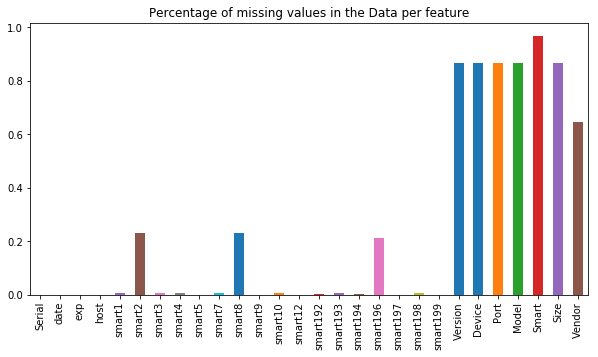

In [24]:
# and plot them 
plt.figure(figsize=(10,5))
mising_df.plot(kind='bar')
plt.title('Percentage of missing values in the Data per feature')
plt.show()

In [25]:
plot_data_cms   = data[data.exp=='cms'][['Serial','date']].groupby('date').Serial.nunique()
plot_data_atlas = data[data.exp=='atlas'][['Serial','date']].groupby('date').Serial.nunique()
plot_data_lhcb  = data[data.exp=='lhcb'][['Serial','date']].groupby('date').Serial.nunique()
plot_data_alice = data[data.exp=='alice'][['Serial','date']].groupby('date').Serial.nunique()

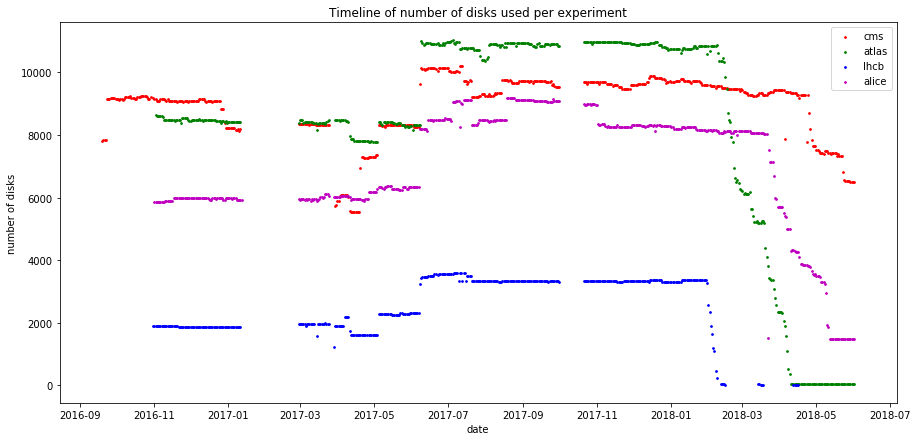

In [26]:
plt.figure(figsize=(15,7))
plt.scatter(plot_data_cms.index, plot_data_cms,     s=3, c='r', label='cms')
plt.scatter(plot_data_atlas.index, plot_data_atlas, s=3, c='g', label='atlas')
plt.scatter(plot_data_lhcb.index, plot_data_lhcb,   s=3, c='b', label='lhcb')
plt.scatter(plot_data_alice.index, plot_data_alice, s=3, c='m', label='alice')
plt.xlabel("date")
plt.ylabel("number of disks")
plt.title('Timeline of number of disks used per experiment')
plt.legend(loc='best')
plt.show()

## Let's find failures (The Simples Method)

**Failure definition from CERN colleagues**

* A disk considered as **'suspect' of failure**:
    * when it disappeared from the daily smart data collection
    * while the other disks in the machine continue to report
    

In [75]:
# let's identify amount of serial per day for each host
host_date_number = data.groupby(['host', 'date'])['Serial'].count()

In [76]:
# for each host we know amount of serial per day
host_date_number.head(10)

host         date               
LXFSRD38C01  2016-11-01 01:00:00    26
             2016-11-02 01:00:00    26
             2016-11-03 01:00:00    26
             2016-11-04 01:00:00    26
             2016-11-05 01:00:00    26
             2016-11-06 01:00:00    26
             2016-11-07 01:00:00    26
             2016-11-08 01:00:00    26
             2016-11-09 01:00:00    26
             2016-11-10 01:00:00    26
Name: Serial, dtype: int64

In [77]:
# calculate std for timeseries mentioned above
get_std_for_ts = host_date_number.groupby('host').std()

# let's grab all host with non-constant std, which means that they have some changes in amount of disks during period of usage
# these are the host id's where a disk failure might have occured
possibly_bad_hosts = get_std_for_ts[get_std_for_ts!=0]
print(f'Amount of hosts with possibly failured hosts: {len(possibly_bad_hosts)}')

Amount of hosts with possibly failured hosts: 189


In [79]:
print(possibly_bad_hosts[:10])

host
LXFSRD46C01    11.545710
LXFSRD50C01     1.392173
LXFSRD56C01     0.478955
LXFSRD56C03     0.070888
LXFSRD62C02     0.476815
LXFSRD64C01     0.576426
LXFSRD66C01    11.064639
LXFSRE02B08     0.394654
LXFSRE05A07     0.401751
LXFSRE06B02     0.496489
Name: Serial, dtype: float64


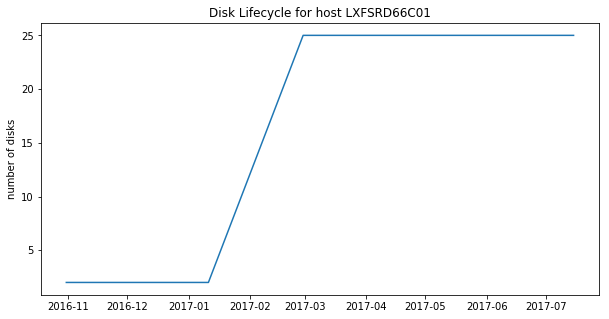

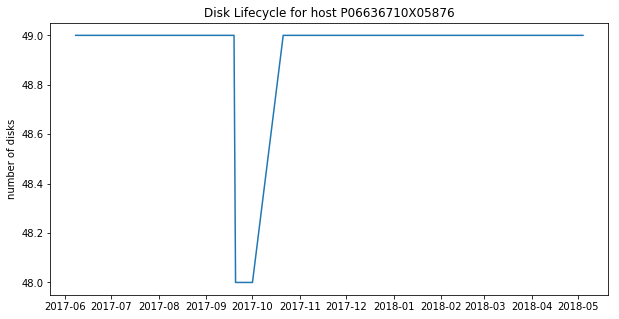

In [31]:
# let's visualize few hosts
def plot_disk_per_host(host_name):
    host = data[data.host == host_name]
    plt.figure(figsize=(10,5))
    plt.plot(host.groupby('date')['Serial'].count())
    plt.title('Disk Lifecycle for host '+host_name)
    plt.ylabel('number of disks')
    plt.show()

plot_disk_per_host('LXFSRD66C01')
plot_disk_per_host('P06636710X05876')

In [32]:
# let's take subset for only possibly failed hosts
possibly_bad_hosts_df = data[['host','Serial','date']][data.host.isin(possibly_bad_hosts.index)].groupby(['host','date'])['Serial'].apply(list).reset_index() 
# now we get a dataframe where the number of unique serials is collected in a list for every host & date
possibly_bad_hosts_df.head()

,host,date,Serial
0,LXFSRD46C01,2016-10-31 01:00:00,"[WD-WMAYP2104752, WD-WMAYP2105314]"
1,LXFSRD46C01,2016-11-01 01:00:00,"[WD-WMAYP2104752, WD-WMAYP2105314]"
2,LXFSRD46C01,2016-11-02 01:00:00,"[WD-WMAYP2104752, WD-WMAYP2105314]"
3,LXFSRD46C01,2016-11-03 01:00:00,"[WD-WMAYP2104752, WD-WMAYP2105314]"
4,LXFSRD46C01,2016-11-04 01:00:00,"[WD-WMAYP2104752, WD-WMAYP2105314]"


In [80]:
# let's find our bad drives (you can and should improve this method)
bad_serials = []

# loop over every host with possibility of a hard disk failure 
for host in possibly_bad_hosts.index:
    
    current_host_df = possibly_bad_hosts_df[possibly_bad_hosts_df.host == host]
    prev_set = set([])
    
    # if the number of hard disk reporting for a given date is one less than the day before we label it as a failure
    for idx, row in current_host_df.iterrows():
        current_set = set(row[2])
        difference  = prev_set.difference(current_set)
        if  prev_set.issubset(current_set) or len(current_set) >= len(prev_set):
            prev_set = current_set
            continue
        elif len(difference) == 1:
            # get failed serial 
            bad_serials.append(difference.pop())
            prev_set = current_set

In [81]:
print(f'Amount of failured disks: {len(bad_serials)}')

Amount of failured disks: 161


In [82]:
failed_disks = data[data.Serial.isin(bad_serials)]
print(f'First ten bad disks:\n{failed_disks.Serial.unique()[:10]}')

First ten bad disks:
['17NRK0WFFTMB' '272AKDSFFTMB' 'K1HAGNAB' 'K1HDDSUD' 'K1HDG0AD' 'K1HE3YMD'
 'K1HE5MVD' 'NAHV6A8X' 'NAHV72LX' 'NAHVHVKY']


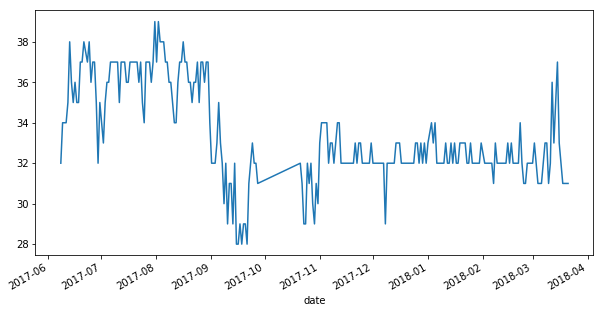

In [83]:
# let's see how smart 194 behaves before a crash
plt.figure(figsize=(10,5))
failed_disks[failed_disks.Serial == '17NRK0WFFTMB'].set_index('date').smart194.plot()
plt.show()

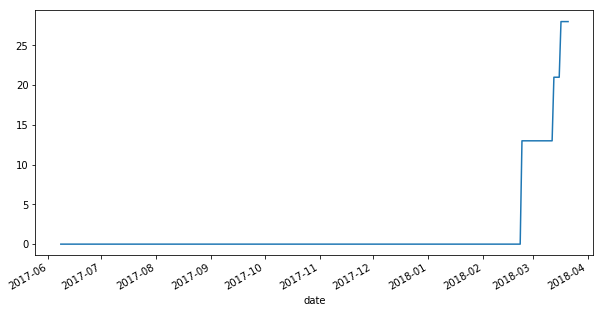

In [37]:
#Smart 196 before the crash
plt.figure(figsize=(10,5))
failed_disks[failed_disks.Serial == '17NRK0WFFTMB'].set_index('date').smart196.plot()
plt.show()

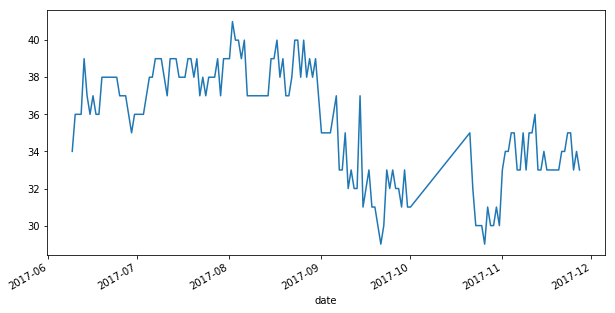

In [38]:
# let's see how smart 194 behaves before another crash
plt.figure(figsize=(10,5))
failed_disks[failed_disks.Serial == 'K1HDG0AD'].set_index('date').smart194.plot()
plt.show()

## Baseline

Here we show you a really simple and basic model to help you get started

In [84]:
X_bad = []

for bad_serial in bad_serials:
    smart_194 = failed_disks[failed_disks.Serial == bad_serial][['smart194']].values
    
    # we will take last 30 days from time serie
    if len(smart_194) > 30:
        X_bad.append(smart_194[-30:].ravel())

X_bad = np.array(X_bad)        
X_bad = X_bad[~np.isnan(X_bad).any(axis=1)]

In [85]:
X_good = []

good_serials = data.Serial.sample(n=500).values
good_serials = [serial for serial in good_serials if serial not in bad_serials]
good_disks   = data[data.Serial.isin(good_serials)] 

for good_serial in good_serials:
    smart_194 = good_disks[good_disks.Serial == good_serial][['smart194']].values
    
    if len(smart_194) > 30:
        X_good.append(smart_194[-30:].ravel())

X_good = np.array(X_good)        
X_good = X_good[~np.isnan(X_good).any(axis=1)]

In [86]:
X = np.concatenate([X_good, X_bad], axis=0)
y = np.concatenate([np.zeros(len(X_good)), np.ones(len(X_bad))], axis=0)

In [87]:
print(f'shape for feature matrix X is: {X.shape}')
print(f'shape for label   column y is: {y.shape}')

shape for feature matrix X is: (643, 30)
shape for label   column y is: (643,)


In [88]:
# lets randomly split data for train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)

print(f'shape for feature matrix X_train is: {X_train.shape}')
print(f'shape for label   column y_train is: {y_train.shape}')
print(f'shape for feature matrix X_test is : {X_test.shape}')
print(f'shape for label   column y_test is : {y_test.shape}')

shape for feature matrix X_train is: (514, 30)
shape for label   column y_train is: (514,)
shape for feature matrix X_test is : (129, 30)
shape for label   column y_test is : (129,)


 - We will use **Random Forest Classifier** for our toy baseline

In [89]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# init the classifier
rf_clf = RandomForestClassifier(random_state=2018)

# fit data to the model
rf_clf.fit(X_train, y_train)

# predict result
y_pred = rf_clf.predict(X_test)


print(f'Accuracy of model: {accuracy_score(y_test, y_pred)}')
print(f'Precision of model: {precision_score(y_test, y_pred)}')
print(f'Recall of model: {recall_score(y_test, y_pred)}')
print(f'Roc of model: {roc_auc_score(y_test, y_pred)}')
# of course accuracy isnt a good metrics for judging this model
# come up with a good one when you build your model

Accuracy of model: 0.7906976744186046
Precision of model: 0.5333333333333333
Recall of model: 0.2857142857142857
Roc of model: 0.6082036775106081


In [56]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_pred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.30


Text(0.5,1,'2-class Precision-Recall curve: AP=0.30')

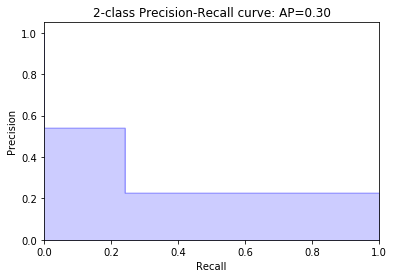

In [57]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test, y_pred)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

## We wish you luck in Hackathon! 

Feel free to stay connected with us via LinkedIn/Github:
- Vladimir Osin - [[LinkedIn]](https://www.linkedin.com/in/vosin/), [[Github]](https://github.com/osin-vladimir)
- Ekhtiar Syed  - [[LinkedIn]](https://www.linkedin.com/in/ekhtiar/), [[Github]](https://github.com/ekhtiar)

Our open educational initiative Open DSE - [[Github]](https://github.com/open-dse)


<img src="https://avatars2.githubusercontent.com/u/38860425?s=200&v=4"
 alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;" />
